In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2


In [2]:
df_edges = pd.read_csv("csv_outputs/graph_channels_large.csv", sep=';')
df_edges = df_edges.drop(df_edges[df_edges.weight < 16].index)
#df_edges.loc[df_edges[df_edges.weight < 16].index, 'weight'] = 16
display(df_edges.head())


,source,target,weight
0,0,1,12881
1,0,2,8482
2,0,3,20346
3,0,4,14911
5,0,6,1268


In [3]:
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)
G.remove_nodes_from(list(nx.isolates(G)))
remove = [node for node,degree in dict(G.degree()).items() if degree <41]
G.remove_nodes_from(remove)
print(len(G.nodes))
#print(sorted(G.degree, key=lambda x: x[1], reverse=True))


1677


In [4]:
forceatlas2 = ForceAtlas2(gravity=0.5)
posses = forceatlas2.forceatlas2_networkx_layout(G,iterations=1000)

100%|██████████| 1000/1000 [00:46<00:00, 21.72it/s]


BarnesHut Approximation  took  14.48  seconds
Repulsion forces  took  19.77  seconds
Gravitational forces  took  0.11  seconds
Attraction forces  took  10.11  seconds
AdjustSpeedAndApplyForces step  took  0.59  seconds


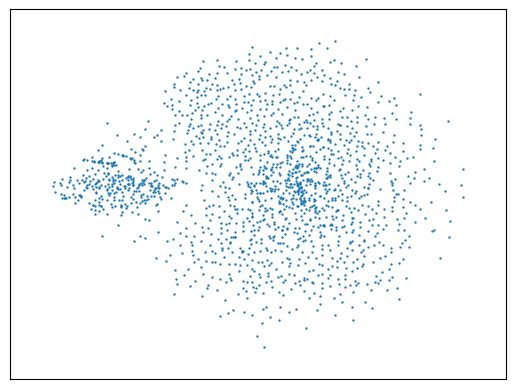

In [5]:
nx.draw_networkx(G, pos=posses, with_labels=False, width=0,node_size=0.5)


In [6]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=1.2, threshold=1e-1,seed=1)
print("We have {nbr}".format(nbr=len(louvain_partitions)))

We have 8


In [7]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 333 members
Community number 1 has 2 members
Community number 2 has 139 members
Community number 3 has 320 members
Community number 4 has 2 members
Community number 5 has 191 members
Community number 6 has 260 members
Community number 7 has 430 members


0 - ok
1 - ok
2 - ok
3 - not ok
4 - not ok
5 - ok
6 - not ok
7 - ok


In [8]:
display(louvain_partitions[0])

{6,
 7,
 9,
 10,
 15,
 37,
 53,
 61,
 67,
 78,
 88,
 96,
 122,
 137,
 142,
 173,
 191,
 200,
 215,
 246,
 252,
 266,
 267,
 280,
 313,
 314,
 326,
 331,
 344,
 362,
 374,
 384,
 391,
 397,
 412,
 413,
 428,
 442,
 459,
 463,
 466,
 469,
 472,
 523,
 531,
 534,
 550,
 551,
 559,
 561,
 582,
 590,
 593,
 610,
 622,
 624,
 626,
 627,
 630,
 642,
 651,
 663,
 669,
 674,
 683,
 691,
 692,
 708,
 709,
 714,
 727,
 740,
 741,
 744,
 769,
 784,
 814,
 817,
 821,
 822,
 831,
 839,
 843,
 846,
 847,
 862,
 879,
 896,
 902,
 904,
 909,
 912,
 925,
 928,
 931,
 945,
 946,
 954,
 969,
 971,
 972,
 976,
 985,
 987,
 995,
 997,
 999,
 1006,
 1008,
 1014,
 1021,
 1028,
 1038,
 1039,
 1043,
 1048,
 1050,
 1053,
 1057,
 1061,
 1069,
 1071,
 1078,
 1080,
 1094,
 1098,
 1104,
 1110,
 1113,
 1117,
 1118,
 1122,
 1127,
 1130,
 1132,
 1133,
 1138,
 1150,
 1157,
 1160,
 1162,
 1167,
 1176,
 1182,
 1188,
 1190,
 1206,
 1207,
 1209,
 1218,
 1224,
 1225,
 1237,
 1238,
 1259,
 1260,
 1263,
 1265,
 1266,
 1270,
 1

In [9]:
filtered_channels = list(louvain_partitions[0])
filtered_channels = filtered_channels + (list(louvain_partitions[1]))
filtered_channels = filtered_channels + (list(louvain_partitions[2]))
filtered_channels = filtered_channels + (list(louvain_partitions[5]))
filtered_channels = filtered_channels + (list(louvain_partitions[7]))

filtered_channels = sorted(filtered_channels)
print("We have {nbr} channels left".format(nbr=len(filtered_channels)))
filtered_channels_list = filtered_channels
filtered_channels = pd.DataFrame(filtered_channels)
display(filtered_channels.head())

We have 1095 channels left


,0
0,6
1,7
2,9
3,10
4,11


In [10]:
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large_fix.csv", sep=';', index=False)

In [11]:
def filter_function(n):
    return n in filtered_channels_list

sub_G = nx.subgraph_view(G, filter_node=filter_function)

In [12]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=1.1,threshold=1e-1, seed=1)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 7 communities


In [13]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 341 members
Community number 1 has 140 members
Community number 2 has 104 members
Community number 3 has 255 members
Community number 4 has 98 members
Community number 5 has 155 members
Community number 6 has 2 members


- 0 CNN, Truly --> lean left
- 1 TYT  --> left
- 2 youtube spotlight UK, AP archive
- 3  White House, Jason A(événements d'aujourd'hui qui ont un rapport avec la bible), AMTV
- 4 Philipp de Franco, Paul Joseph Watson, Sourcefed
- 5 Daily Wire, Mark Dice --> Right
- 6 LiveNow from Fox, NPR


In [14]:
display(louvain_communities[6])

{199, 527}

In [15]:
#louvain_communities[0], louvain_communities[1] = louvain_communities[1], louvain_communities[0]
mapping = {}
for i, l in enumerate(louvain_communities):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] =i

for n in sub_G.nodes:
    sub_G.nodes[n]["louvain"] = mapping[n]





#print(mapping)

In [16]:
#pos = nx.shell_layout(sub_G)
pos_dict ={0: (0,0), 1: (-100, 0), 2: (-150, 0), 3: (-200, -100), 4:(-100 ,-100),5:(0, -100), 6:(-100, -100) }
pos ={x : pos_dict.get(sub_G.nodes[x]["louvain"]) for x in sub_G.nodes}

In [17]:
forceatlas2 = ForceAtlas2(gravity=0.0002)
posses = forceatlas2.forceatlas2_networkx_layout(sub_G,iterations=1000, pos=pos)

100%|██████████| 1000/1000 [00:40<00:00, 24.58it/s]


BarnesHut Approximation  took  10.14  seconds
Repulsion forces  took  18.32  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  10.18  seconds
AdjustSpeedAndApplyForces step  took  0.66  seconds


In [18]:
import cmasher as cmr
cmap = cmr.get_sub_cmap('CMRmap', 0.15, 0.95, N=len(louvain_communities))

/tmp/ipykernel_473/1638244907.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  yt = cb.ax.set_yticklabels(['Leaning Left', 'Left','Random', 'White House + conspiratists', 'youtube', 'Far right', 'LiveNow from Fox'])


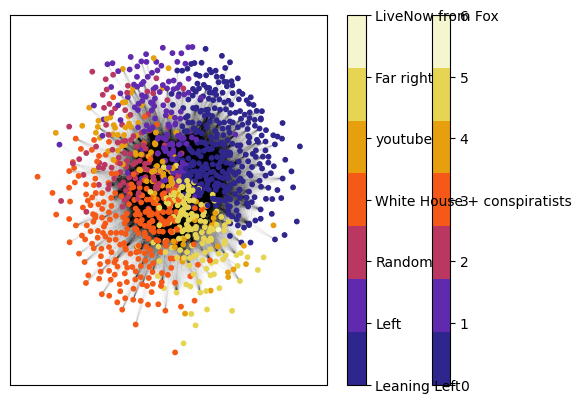

In [19]:

nc = nx.draw_networkx_nodes(sub_G, pos=posses, node_size=10, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=cmap)
ec = nx.draw_networkx_edges(sub_G, pos=posses, width=0.0005)
#nx.draw_networkx_labels(sub_G, pos=posses)
#nx.draw_networkx(sub_G, pos=posses, with_labels=False, width=0,node_size=0.5, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=plt.cm.bwr)

cb = plt.colorbar(nc, ticks=[0,1,2,3,4,5,6])
cb = plt.colorbar(nc)

yt = cb.ax.set_yticklabels(['Leaning Left', 'Left','Random', 'White House + conspiratists', 'youtube', 'Far right', 'LiveNow from Fox'])


In [20]:
a0 =list(louvain_communities[0])
a1 =list(louvain_communities[1])
a2 =list(louvain_communities[2])
a3 =list(louvain_communities[3])
a4 =list(louvain_communities[4])
a5 =list(louvain_communities[5])

b0 = list(np.full_like(a0,0))
b1 = list(np.full_like(a1,1))
b2 = list(np.full_like(a2,2))
b3 = list(np.full_like(a3,3))
b4 = list(np.full_like(a4,4))
b5 = list(np.full_like(a5,5))


In [21]:
communities=a0 + a1 + a2 + a3 + a4 + a5
indices = b0 + b1 + b2 + b3 + b4 + b5

In [22]:
d = {'channel': communities, 'community': indices}
df = pd.DataFrame(data=d)
display(df.head())

,channel,community
0,2049,0
1,1028,0
2,6,0
3,7,0
4,9,0


In [23]:
df.to_csv("csv_outputs/louvain_communities_channels_large.csv", sep=';', index=False)